In [1]:
from cycle_gan import CycleGAN

import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

from utils import load_model, load_yaml

/home/seungwon/anaconda3/envs/cv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set the configuration
config = load_yaml("/home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/config/cycle_gan_config.yml")

# Training setting
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(config['data']['seed'])
if device == 'cuda':
  torch.cuda.manual_seed_all(config['data']['seed'])

# Set the model
model = CycleGAN(gen_input_dim=config['model']['gen_input_dim'], gen_output_dim=config['model']['gen_output_dim'],
                 dis_input_dim=config['model']['dis_input_dim'], dis_conv_filters=config['model']['dis_conv_filters'],
                 dis_conv_kernels=config['model']['dis_conv_kernels'], dis_conv_strides=config['model']['dis_conv_strides'],
                 dis_conv_pads=config['model']['dis_conv_pads'], dis_norm=config['model']['dis_norm']).to(device)

model, _, _, _ = load_model('/home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/models/style_transfer/2023.07.27.21.06.36/style_transfer_best.pt', model)
print(model)

Load the yaml file from /home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/config/cycle_gan_config.yml
Loaded the model from /home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/models/style_transfer/2023.07.27.21.06.36/style_transfer_best.pt successfully
CycleGAN(
  (Gxy): UNet(
    (sample_norm64): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm128): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm256): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm512): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm1024): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil

/home/seungwon/anaconda3/envs/cv/lib/python3.8/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


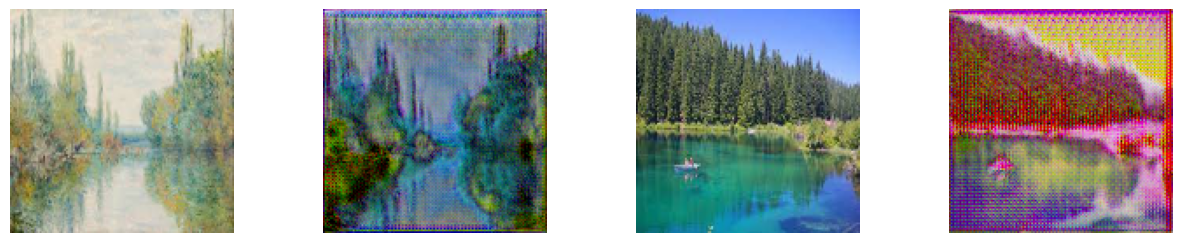

In [11]:
# Set the transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize(config['data']['img_size'])])
# Set the data
imgA = plt.imread(config['data']['imgA_path'])
imgA = transform(imgA)
imgA = imgA.to(device)

imgB = plt.imread(config['data']['imgB_path'])
imgB = transform(imgB)
imgB = imgB.to(device)

np.random.seed(777)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
model.eval()

genA = model.Gyx(imgB.unsqueeze(dim=0))
genB = model.Gxy(imgA.unsqueeze(dim=0))

sub = fig.add_subplot(1, 4, 1)
sub.axis('off')
sub.imshow(imgA.permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(1, 4, 2)
sub.axis('off')
sub.imshow(genB.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(1, 4, 3)
sub.axis('off')
sub.imshow(imgB.permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(1, 4, 4)
sub.axis('off')
sub.imshow(genA.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())


